### Labolatorium 2 PySpark

In [0]:
#Zad 1
from pyspark.sql import SparkSession

base_path = "/Volumes/workspace/default/data/"

df_movies = spark.read.format("csv") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load(f"{base_path}movies.csv")

df_users = spark.read.format("csv") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load(f"{base_path}users.csv")

df_ratings = spark.read.format("csv") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load(f"{base_path}ratings.csv")

df_tags = spark.read.format("csv") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load(f"{base_path}tags.csv")

df_movies.printSchema()
df_movies.show(5)

#rdd_movies = spark.sparkContext.textFile(f"{base_path}movies.csv")


root
 |-- movieId: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- genres: string (nullable = true)

+-------+--------------------+--------------------+
|movieId|               title|              genres|
+-------+--------------------+--------------------+
|      1|    Toy Story (1995)|Adventure|Animati...|
|      2|      Jumanji (1995)|Adventure|Childre...|
|      3|Grumpier Old Men ...|      Comedy|Romance|
|      4|Waiting to Exhale...|Comedy|Drama|Romance|
|      5|Father of the Bri...|              Comedy|
+-------+--------------------+--------------------+
only showing top 5 rows


Zad 2
RDD to oryginalne API od Spark. Jest to zbiór danych bez schematu (lista). DataFrame przypomina standardową tabelę z kolumnami i wierszami. DataFrame jest nowszy i szybszy.

In [0]:
#Zad 3
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DoubleType, LongType

base_path = "/Volumes/workspace/default/data/"

movies_schema = StructType([
    StructField("movieId", IntegerType(), True),
    StructField("title", StringType(), True),
    StructField("genres", StringType(), True)
])

users_schema = StructType([
    StructField("userId", IntegerType(), True),
    StructField("foreName", StringType(), True),
    StructField("surName", StringType(), True),
    StructField("email", StringType(), True)
])

df_movies_fixed = spark.read.format("csv") \
    .option("header", "true") \
    .schema(movies_schema) \
    .load(f"{base_path}movies.csv")

df_users_fixed = spark.read.format("csv") \
    .option("header", "true") \
    .schema(users_schema) \
    .load(f"{base_path}users.csv")

df_movies_fixed.printSchema()
df_users_fixed.show(5)

root
 |-- movieId: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- genres: string (nullable = true)

+------+--------+--------+--------------------+
|userId|foreName| surName|               email|
+------+--------+--------+--------------------+
|     1|  Victor| Skinner|victor.skinner@mo...|
|     2|   Boris|  Howard|boris.howard@movi...|
|     3| Richard|   Avery|richard.avery@mov...|
|     4|   Simon|Metcalfe|simon.metcalfe@mo...|
|     5|  Robert|   Black|robert.black@movi...|
+------+--------+--------+--------------------+
only showing top 5 rows


In [0]:
#Zad 4
from pyspark.sql.functions import current_timestamp, year, month, dayofmonth, hour, split, explode, col, regexp_extract, regexp_replace

df_task4 = df_movies_fixed.withColumn("now", current_timestamp()) \
    .withColumn("rok", year("now")) \
    .withColumn("miesiac", month("now")) \
    .withColumn("dzien", dayofmonth("now")) \
    .withColumn("godzina", hour("now"))

df_task4.select("movieId", "title", "genres", "rok", "miesiac", "dzien", "godzina").show(5, truncate=False)

+-------+----------------------------------+-------------------------------------------+----+-------+-----+-------+
|movieId|title                             |genres                                     |rok |miesiac|dzien|godzina|
+-------+----------------------------------+-------------------------------------------+----+-------+-----+-------+
|1      |Toy Story (1995)                  |Adventure|Animation|Children|Comedy|Fantasy|2026|1      |20   |14     |
|2      |Jumanji (1995)                    |Adventure|Children|Fantasy                 |2026|1      |20   |14     |
|3      |Grumpier Old Men (1995)           |Comedy|Romance                             |2026|1      |20   |14     |
|4      |Waiting to Exhale (1995)          |Comedy|Drama|Romance                       |2026|1      |20   |14     |
|5      |Father of the Bride Part II (1995)|Comedy                                     |2026|1      |20   |14     |
+-------+----------------------------------+----------------------------

In [0]:
#Zad 5

df_task5 = df_movies_fixed \
    .withColumn("genre", explode(split(col("genres"), "\\|"))) \
    .withColumn("year", regexp_extract(col("title"), r"\((\d{4})\)", 1)) \
    .withColumn("title_clean", regexp_replace(col("title"), r"\s*\(\d{4}\)", "")) 

df_task5.select(
    col("movieId"), 
    col("genre"), 
    col("title_clean").alias("title"),
    col("year")
).show(10, truncate=False)

+-------+---------+----------------+----+
|movieId|genre    |title           |year|
+-------+---------+----------------+----+
|1      |Adventure|Toy Story       |1995|
|1      |Animation|Toy Story       |1995|
|1      |Children |Toy Story       |1995|
|1      |Comedy   |Toy Story       |1995|
|1      |Fantasy  |Toy Story       |1995|
|2      |Adventure|Jumanji         |1995|
|2      |Children |Jumanji         |1995|
|2      |Fantasy  |Jumanji         |1995|
|3      |Comedy   |Grumpier Old Men|1995|
|3      |Romance  |Grumpier Old Men|1995|
+-------+---------+----------------+----+
only showing top 10 rows


In [0]:
#Zad 6

ratings_schema = StructType([
    StructField("userId", IntegerType(), True),
    StructField("movieId", IntegerType(), True),
    StructField("rating", DoubleType(), True),
    StructField("timestamp", LongType(), True)
])

df_ratings = spark.read.format("csv") \
    .option("header", "true") \
    .schema(ratings_schema) \
    .load(f"{base_path}ratings.csv")

df_ratings.printSchema()
df_ratings.show(5)

root
 |-- userId: integer (nullable = true)
 |-- movieId: integer (nullable = true)
 |-- rating: double (nullable = true)
 |-- timestamp: long (nullable = true)

+------+-------+------+---------+
|userId|movieId|rating|timestamp|
+------+-------+------+---------+
|     1|      1|   4.0|964982703|
|     1|      3|   4.0|964981247|
|     1|      6|   4.0|964982224|
|     1|     47|   5.0|964983815|
|     1|     50|   5.0|964982931|
+------+-------+------+---------+
only showing top 5 rows


In [0]:
#Zad 7
from pyspark.sql.functions import from_unixtime, col, year, month, dayofmonth

df_ratings_with_dates = df_ratings \
    .withColumn("datetime", from_unixtime(col("timestamp"))) \
    .withColumn("year", year("datetime")) \
    .withColumn("month", month("datetime")) \
    .withColumn("day", dayofmonth("datetime"))

df_ratings_with_dates.show(5)

+------+-------+------+---------+-------------------+----+-----+---+
|userId|movieId|rating|timestamp|           datetime|year|month|day|
+------+-------+------+---------+-------------------+----+-----+---+
|     1|      1|   4.0|964982703|2000-07-30 18:45:03|2000|    7| 30|
|     1|      3|   4.0|964981247|2000-07-30 18:20:47|2000|    7| 30|
|     1|      6|   4.0|964982224|2000-07-30 18:37:04|2000|    7| 30|
|     1|     47|   5.0|964983815|2000-07-30 19:03:35|2000|    7| 30|
|     1|     50|   5.0|964982931|2000-07-30 18:48:51|2000|    7| 30|
+------+-------+------+---------+-------------------+----+-----+---+
only showing top 5 rows


In [0]:
#Zad 8
from pyspark.sql.functions import count

df_ratings_by_year = df_ratings_with_dates.groupBy("year") \
    .count() \
    .withColumnRenamed("count", "liczba_ocen") \
    .orderBy("year")

df_ratings_by_year.show(10)

+----+-----------+
|year|liczba_ocen|
+----+-----------+
|1996|       6040|
|1997|       1916|
|1998|        507|
|1999|       2439|
|2000|      10061|
|2001|       3922|
|2002|       3478|
|2003|       4014|
|2004|       3279|
|2005|       5813|
+----+-----------+
only showing top 10 rows


+----+-----+-----------+
|year|month|liczba_ocen|
+----+-----+-----------+
|1996|    3|         58|
|1996|    4|        165|
|1996|    5|        832|
|1996|    6|        883|
|1996|    7|        489|
+----+-----+-----------+
only showing top 5 rows


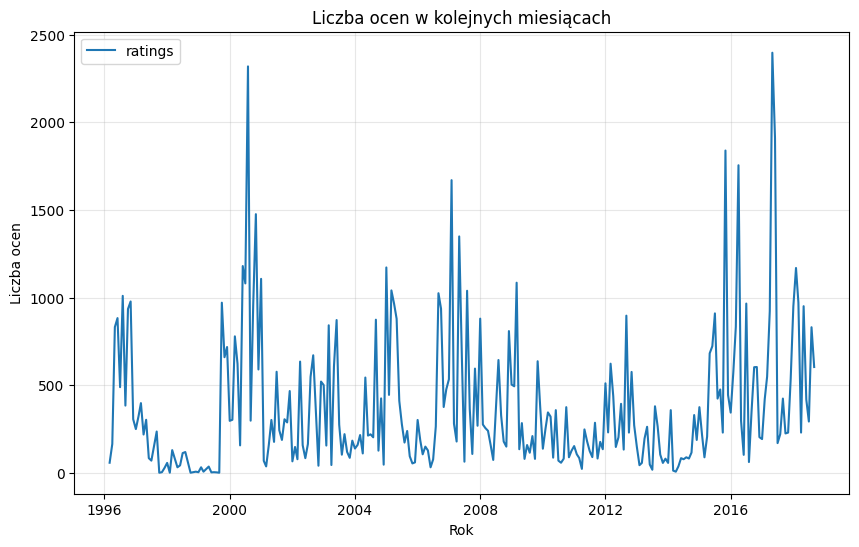

In [0]:
#Zad 9
import matplotlib.pyplot as plt
import pandas as pd

df_ratings_by_month = df_ratings_with_dates.groupBy("year", "month") \
    .count() \
    .withColumnRenamed("count", "liczba_ocen") \
    .orderBy("year", "month")

df_ratings_by_month.show(5)
pdf = df_ratings_by_month.toPandas()
pdf['date'] = pd.to_datetime(pdf[['year', 'month']].assign(DAY=1))

plt.figure(figsize=(10, 6))
plt.plot(pdf['date'], pdf['liczba_ocen'], label='ratings')
plt.title("Liczba ocen w kolejnych miesiącach")
plt.xlabel("Rok")
plt.ylabel("Liczba ocen")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show() 


In [0]:
#Zad 10
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, LongType

tags_schema = StructType([
    StructField("userId", IntegerType(), True),
    StructField("movieId", IntegerType(), True),
    StructField("tag", StringType(), True),
    StructField("timestamp", LongType(), True)
])

df_tags = spark.read.format("csv") \
    .option("header", "true") \
    .schema(tags_schema) \
    .load(f"{base_path}tags.csv")

df_tags.printSchema()
df_tags.show(5)

root
 |-- userId: integer (nullable = true)
 |-- movieId: integer (nullable = true)
 |-- tag: string (nullable = true)
 |-- timestamp: long (nullable = true)

+------+-------+---------------+----------+
|userId|movieId|            tag| timestamp|
+------+-------+---------------+----------+
|     2|  60756|          funny|1445714994|
|     2|  60756|Highly quotable|1445714996|
|     2|  60756|   will ferrell|1445714992|
|     2|  89774|   Boxing story|1445715207|
|     2|  89774|            MMA|1445715200|
+------+-------+---------------+----------+
only showing top 5 rows


In [0]:
#Zad 11
df_tags_dates = df_tags \
    .withColumn("datetime", from_unixtime(col("timestamp"))) \
    .withColumn("year", year("datetime")) \
    .withColumn("month", month("datetime")) \
    .withColumn("day", dayofmonth("datetime"))

df_tags_dates.show(5)

+------+-------+---------------+----------+-------------------+----+-----+---+
|userId|movieId|            tag| timestamp|           datetime|year|month|day|
+------+-------+---------------+----------+-------------------+----+-----+---+
|     2|  60756|          funny|1445714994|2015-10-24 19:29:54|2015|   10| 24|
|     2|  60756|Highly quotable|1445714996|2015-10-24 19:29:56|2015|   10| 24|
|     2|  60756|   will ferrell|1445714992|2015-10-24 19:29:52|2015|   10| 24|
|     2|  89774|   Boxing story|1445715207|2015-10-24 19:33:27|2015|   10| 24|
|     2|  89774|            MMA|1445715200|2015-10-24 19:33:20|2015|   10| 24|
+------+-------+---------------+----------+-------------------+----+-----+---+
only showing top 5 rows


+----+-----+-----+
|year|month|count|
+----+-----+-----+
|2006|    1| 1462|
|2006|    2|   39|
|2006|    3|   13|
|2006|    4|    7|
|2006|    6|    1|
|2006|    8|    1|
|2006|   10|    9|
|2006|   11|    1|
|2007|    1|    1|
|2007|    2|    1|
+----+-----+-----+
only showing top 10 rows


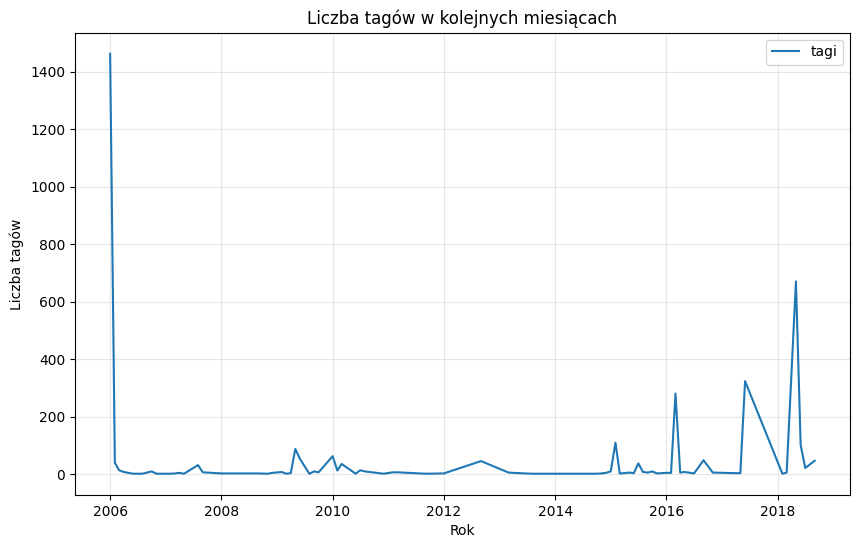

In [0]:
#Zad 12 

df_tags_by_month = df_tags_dates.groupBy("year", "month") \
    .count() \
    .orderBy("year", "month")

df_tags_by_month.show(10)

pdf_tags = df_tags_by_month.toPandas()

pdf_tags['date'] = pd.to_datetime(pdf_tags[['year', 'month']].assign(DAY=1))

plt.figure(figsize=(10, 6))
plt.plot(pdf_tags['date'], pdf_tags['count'], label='tagi')
plt.title("Liczba tagów w kolejnych miesiącach")
plt.xlabel("Rok")
plt.ylabel("Liczba tagów")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [0]:
#Zad 13
df_movies = spark.read.format("csv") \
    .option("header", "true") \
    .schema(movies_schema) \
    .load(f"{base_path}movies.csv")

df_movies.show(5)

+-------+--------------------+--------------------+
|movieId|               title|              genres|
+-------+--------------------+--------------------+
|      1|    Toy Story (1995)|Adventure|Animati...|
|      2|      Jumanji (1995)|Adventure|Childre...|
|      3|Grumpier Old Men ...|      Comedy|Romance|
|      4|Waiting to Exhale...|Comedy|Drama|Romance|
|      5|Father of the Bri...|              Comedy|
+-------+--------------------+--------------------+
only showing top 5 rows


In [0]:
#Zad 14
from pyspark.sql.functions import regexp_extract
df_ratings = spark.read.format("csv") \
    .option("header", "true") \
    .schema(ratings_schema) \
    .load(f"{base_path}ratings.csv")
df_movies_with_year = df_movies.withColumn(
    "production_year", 
    regexp_extract(col("title"), r"\((\d{4})\)", 1)
)

df_joined_movies_ratings = df_movies_with_year.join(df_ratings, "movieId", "inner")

df_joined_movies_ratings.select(
    "movieId", 
    "title", 
    "production_year", 
    "rating", 
    "userId"
).show(10, truncate=False)

+-------+---------------------------+---------------+------+------+
|movieId|title                      |production_year|rating|userId|
+-------+---------------------------+---------------+------+------+
|1      |Toy Story (1995)           |1995           |4.0   |1     |
|3      |Grumpier Old Men (1995)    |1995           |4.0   |1     |
|6      |Heat (1995)                |1995           |4.0   |1     |
|47     |Seven (a.k.a. Se7en) (1995)|1995           |5.0   |1     |
|50     |Usual Suspects, The (1995) |1995           |5.0   |1     |
|70     |From Dusk Till Dawn (1996) |1996           |3.0   |1     |
|101    |Bottle Rocket (1996)       |1996           |5.0   |1     |
|110    |Braveheart (1995)          |1995           |4.0   |1     |
|151    |Rob Roy (1995)             |1995           |5.0   |1     |
|157    |Canadian Bacon (1995)      |1995           |5.0   |1     |
+-------+---------------------------+---------------+------+------+
only showing top 10 rows


In [0]:
#Zad 15
from pyspark.sql.functions import min, max, avg, count, col

df_task15 = df_joined_movies_ratings.groupBy("title") \
    .agg(
        min("rating").alias("min_rating"),
        avg("rating").alias("avg_rating"),
        max("rating").alias("max_rating"),
        count("rating").alias("rating_cnt")
    ) \
    .orderBy(col("rating_cnt").desc())

df_task15.show(5, truncate=False)

+--------------------------------+----------+-----------------+----------+----------+
|title                           |min_rating|avg_rating       |max_rating|rating_cnt|
+--------------------------------+----------+-----------------+----------+----------+
|Forrest Gump (1994)             |0.5       |4.164133738601824|5.0       |329       |
|Shawshank Redemption, The (1994)|1.0       |4.429022082018927|5.0       |317       |
|Pulp Fiction (1994)             |0.5       |4.197068403908795|5.0       |307       |
|Silence of the Lambs, The (1991)|0.5       |4.161290322580645|5.0       |279       |
|Matrix, The (1999)              |0.5       |4.192446043165468|5.0       |278       |
+--------------------------------+----------+-----------------+----------+----------+
only showing top 5 rows


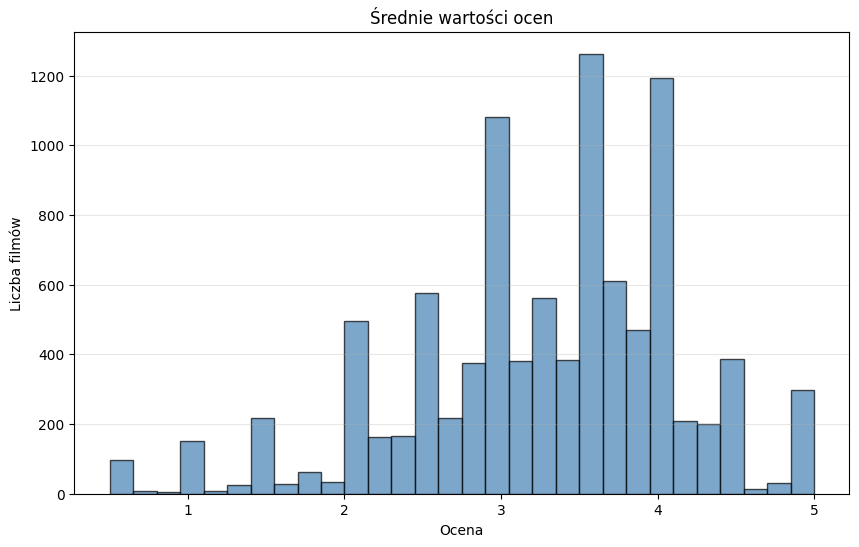

In [0]:
#Zad 16
avg_ratings_list = df_task15.select("avg_rating") \
    .where("rating_cnt >= 0") \
    .toPandas()["avg_rating"]

plt.figure(figsize=(10, 6))
plt.hist(avg_ratings_list, bins=30, color='steelblue', edgecolor='black', alpha=0.7)

plt.title("Średnie wartości ocen")
plt.xlabel("Ocena")
plt.ylabel("Liczba filmów")
plt.grid(axis='y', alpha=0.3)
plt.show()

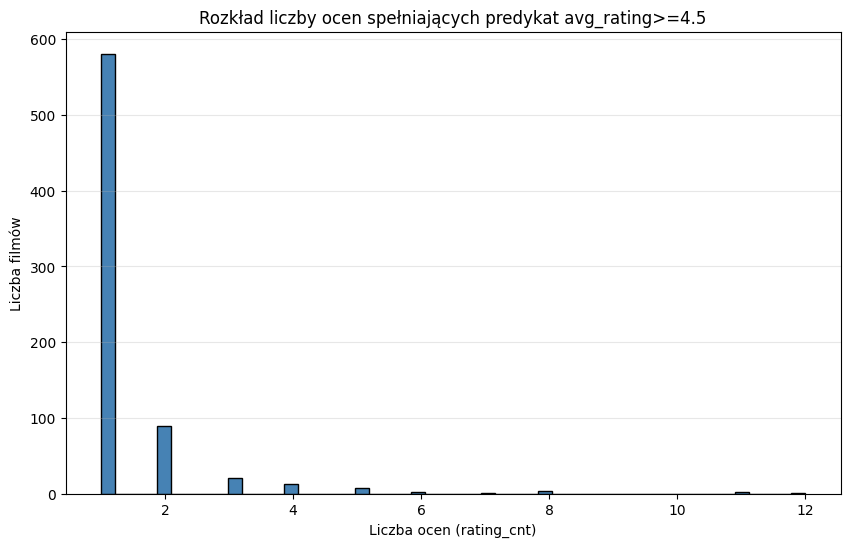

In [0]:
#Zad 17
rating_cnt_list = df_task15.select("rating_cnt") \
    .where("avg_rating >= 4.5") \
    .toPandas()["rating_cnt"]

plt.figure(figsize=(10, 6))
plt.hist(rating_cnt_list, bins=50, color='steelblue', edgecolor='black')

plt.title("Rozkład liczby ocen spełniających predykat avg_rating>=4.5")
plt.xlabel("Liczba ocen (rating_cnt)")
plt.ylabel("Liczba filmów")
plt.grid(axis='y', alpha=0.3)

plt.show()

In [0]:
#Zad 18
from pyspark.sql.functions import col, from_unixtime, year as spark_year, expr
df_movies_with_year = df_movies.withColumn(
    "year", 
    expr("try_cast(regexp_extract(title, '\\\\((\\\\d{4})\\\\)', 1) AS INT)")
)

df_ratings_with_dt = df_ratings.withColumn(
    "datetime", 
    from_unixtime(col("timestamp"))
)

df_mr = df_movies_with_year.join(
    df_ratings_with_dt, 
    df_movies_with_year.movieId == df_ratings_with_dt.movieId, 
    "inner"
)

df_mr = df_mr.withColumn(
    "release_to_rating_year", 
    (spark_year(col("datetime")) - col("year")).cast("double")
)

df_mr = df_mr.drop(df_ratings.movieId)

df_mr.select(
    df_movies_with_year.movieId,
    "genres",
    "title",
    "year",
    "userId",
    "rating",
    "datetime",
    "release_to_rating_year"
).show(5)

+-------+--------------------+--------------------+----+------+------+-------------------+----------------------+
|movieId|              genres|               title|year|userId|rating|           datetime|release_to_rating_year|
+-------+--------------------+--------------------+----+------+------+-------------------+----------------------+
|      1|Adventure|Animati...|    Toy Story (1995)|1995|     1|   4.0|2000-07-30 18:45:03|                   5.0|
|      3|      Comedy|Romance|Grumpier Old Men ...|1995|     1|   4.0|2000-07-30 18:20:47|                   5.0|
|      6|Action|Crime|Thri...|         Heat (1995)|1995|     1|   4.0|2000-07-30 18:37:04|                   5.0|
|     47|    Mystery|Thriller|Seven (a.k.a. Se7...|1995|     1|   5.0|2000-07-30 19:03:35|                   5.0|
|     50|Crime|Mystery|Thr...|Usual Suspects, T...|1995|     1|   5.0|2000-07-30 18:48:51|                   5.0|
+-------+--------------------+--------------------+----+------+------+------------------

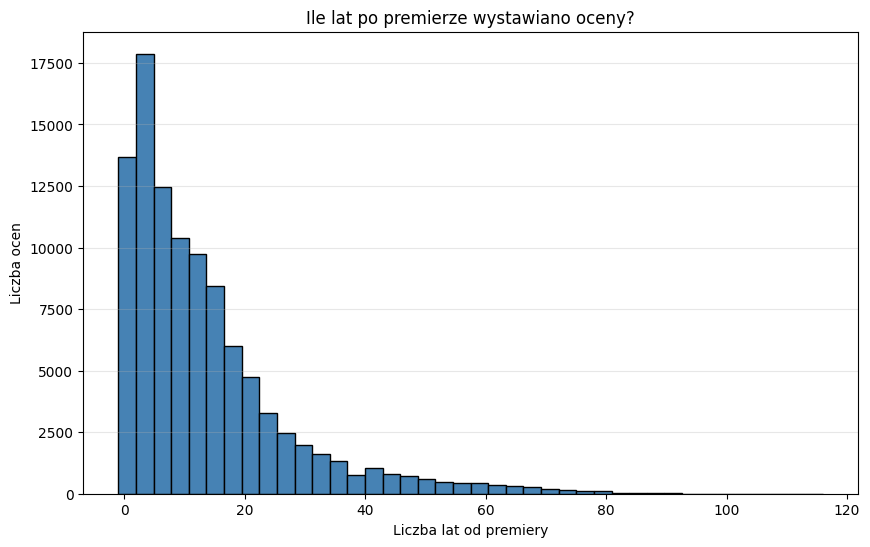

In [0]:
#Zad 19
diff_list = df_mr.select("release_to_rating_year") \
    .where("release_to_rating_year IS NOT NULL") \
    .toPandas()["release_to_rating_year"]

plt.figure(figsize=(10, 6))
plt.hist(diff_list, bins=40, color='steelblue', edgecolor='black')

plt.title("Ile lat po premierze wystawiano oceny?")
plt.xlabel("Liczba lat od premiery")
plt.ylabel("Liczba ocen")
plt.grid(axis='y', alpha=0.3)

plt.show()

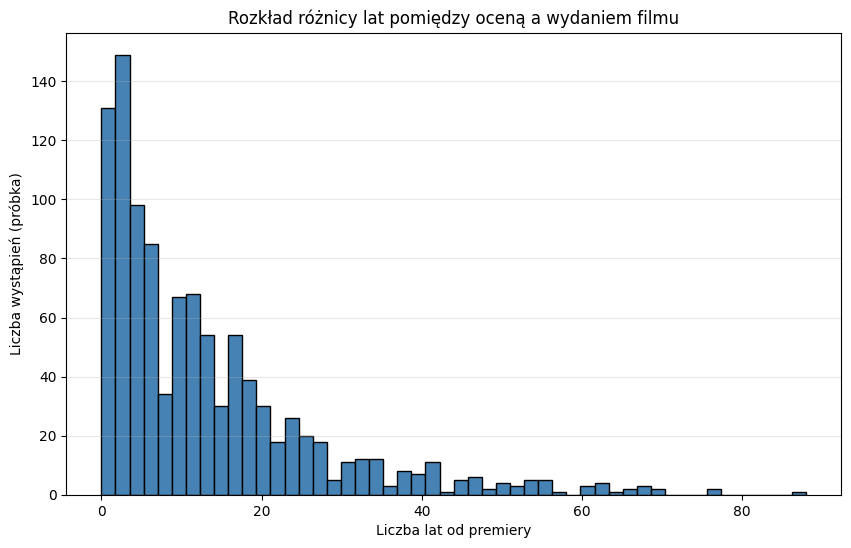

In [0]:
#Zad 20

ratio = 0.01 
df_sampled = df_mr.sample(withReplacement=False, fraction=ratio, seed=42)
diff_list_sampled = df_sampled.select("release_to_rating_year") \
    .where("release_to_rating_year IS NOT NULL") \
    .toPandas()["release_to_rating_year"]

plt.figure(figsize=(10, 6))
plt.hist(diff_list_sampled, bins=50, color='steelblue', edgecolor='black')
plt.title("Rozkład różnicy lat pomiędzy oceną a wydaniem filmu")
plt.xlabel("Liczba lat od premiery")
plt.ylabel("Liczba wystąpień (próbka)")
plt.grid(axis='y', alpha=0.3)

plt.show()

In [0]:
#Zad 21
df_task21 = df_mr.groupBy("release_to_rating_year") \
    .count() \
    .orderBy("release_to_rating_year")
df_task21.show(10)
df_mr2 = df_mr.filter("release_to_rating_year = -1 OR release_to_rating_year IS NULL")
df_mr2.show(105, truncate=False)

+----------------------+-----+
|release_to_rating_year|count|
+----------------------+-----+
|                  NULL|   18|
|                  -1.0|    3|
|                   0.0| 3809|
|                   1.0| 9876|
|                   2.0| 7390|
|                   3.0| 5788|
|                   4.0| 4695|
|                   5.0| 4382|
|                   6.0| 4197|
|                   7.0| 3891|
+----------------------+-----+
only showing top 10 rows
+-------+-------------------------------------------------------+----------------------+----+------+------+----------+-------------------+----------------------+
|movieId|title                                                  |genres                |year|userId|rating|timestamp |datetime           |release_to_rating_year|
+-------+-------------------------------------------------------+----------------------+----+------+------+----------+-------------------+----------------------+
|981    |Dangerous Ground (1997)                       

In [0]:
#Zad 22
regex_pattern = "^(.*?)\\s*\\((\\d{4})\\)\\s*$"

df_movies_v2 = df_movies.withColumn(
    "year_extracted", 
    regexp_extract(col("title"), regex_pattern, 2)
).withColumn(
    "year", 
    expr("try_cast(year_extracted AS INT)")
)

null_count = df_movies_v2.filter(col("year").isNull()).count()

print(f"Liczba wartości NULL po poprawie regex: {null_count}")

Liczba wartości NULL po poprawie regex: 14


In [0]:
#Zad 23
df_movies_final = df_movies_v2.withColumn(
    "title2",
    when(regexp_extract(col("title"), regex_pattern, 1) == "", col("title"))
    .otherwise(regexp_extract(col("title"), regex_pattern, 1))
)
df_movies_final.filter(col("year").isNull()).select("title", "title2", "year").show(10, truncate=False)

+---------------------------------------------------+---------------------------------------------------+----+
|title                                              |title2                                             |year|
+---------------------------------------------------+---------------------------------------------------+----+
|"11'09""01 - September 11 (2002)"                  |"11'09""01 - September 11 (2002)"                  |NULL|
|Babylon 5                                          |Babylon 5                                          |NULL|
|Ready Player One                                   |Ready Player One                                   |NULL|
|Hyena Road                                         |Hyena Road                                         |NULL|
|The Adventures of Sherlock Holmes and Doctor Watson|The Adventures of Sherlock Holmes and Doctor Watson|NULL|
|Nocturnal Animals                                  |Nocturnal Animals                                  |NULL|
|

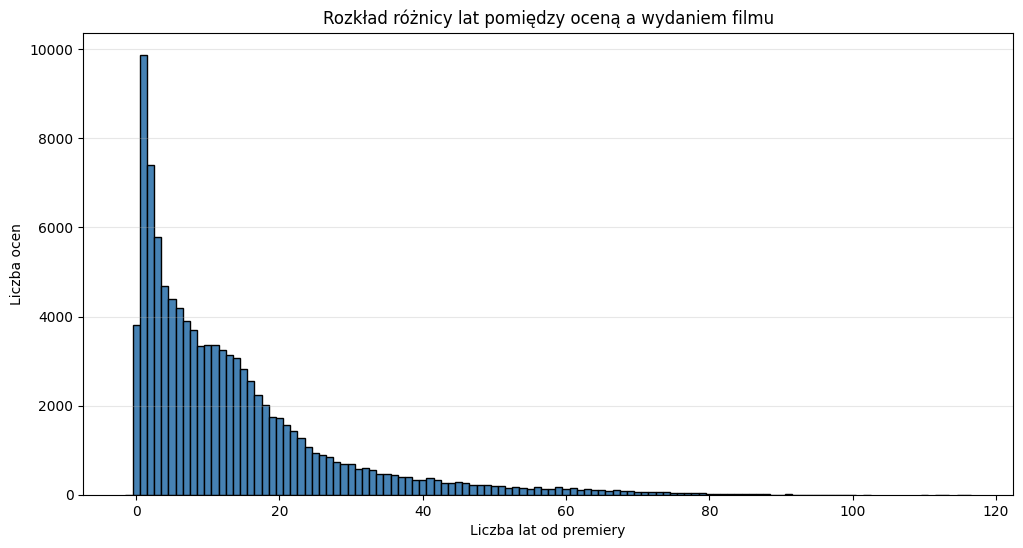

In [0]:
#Zad 24

pdf_hist_data = df_task21.filter(col("release_to_rating_year").isNotNull()).toPandas()

years_list = pdf_hist_data['release_to_rating_year']
counts_list = pdf_hist_data['count']

plt.figure(figsize=(12, 6))
plt.bar(years_list, counts_list, width=1.0, color='steelblue', edgecolor='black')

plt.title("Rozkład różnicy lat pomiędzy oceną a wydaniem filmu")
plt.xlabel("Liczba lat od premiery")
plt.ylabel("Liczba ocen")
plt.grid(axis='y', alpha=0.3)

plt.show()

In [0]:
#Zad 25
df_movies_ratings_genres = df_mr.withColumn(
    "genre", 
    explode(split(col("genres"), "\\|"))
)
df_movies_ratings_genres.select("title", "genre", "rating", "release_to_rating_year").show(10, truncate=False)

+-----------------------+---------+------+----------------------+
|title                  |genre    |rating|release_to_rating_year|
+-----------------------+---------+------+----------------------+
|Toy Story (1995)       |Adventure|4.0   |5.0                   |
|Toy Story (1995)       |Animation|4.0   |5.0                   |
|Toy Story (1995)       |Children |4.0   |5.0                   |
|Toy Story (1995)       |Comedy   |4.0   |5.0                   |
|Toy Story (1995)       |Fantasy  |4.0   |5.0                   |
|Grumpier Old Men (1995)|Comedy   |4.0   |5.0                   |
|Grumpier Old Men (1995)|Romance  |4.0   |5.0                   |
|Heat (1995)            |Action   |4.0   |5.0                   |
|Heat (1995)            |Crime    |4.0   |5.0                   |
|Heat (1995)            |Thriller |4.0   |5.0                   |
+-----------------------+---------+------+----------------------+
only showing top 10 rows


In [0]:
#Zad 26
from pyspark.sql.functions import split, explode, col, regexp_extract, when

regex_wzor = "^(.*?)\\s*\\((\\d{4})\\)\\s*$"

df_movies_p0 = df_movies.withColumn(
    "title_clean", 
    when(regexp_extract(col("title"), regex_wzor, 1) == "", col("title"))
    .otherwise(regexp_extract(col("title"), regex_wzor, 1))
).withColumn(
    "year_val", 
    regexp_extract(col("title"), regex_wzor, 2)
)

df_movies_exploded = df_movies_p0.withColumn(
    "genre", 
    explode(split(col("genres"), "\\|"))
)

df_task26_final = df_movies_exploded.join(
    df_ratings_with_dt, 
    df_movies_exploded.movieId == df_ratings_with_dt.movieId, 
    "inner"
)

df_task26_final.select(
    df_movies_exploded.movieId, 
    "genre", 
    col("title_clean").alias("title"), 
    col("year_val").alias("year"), 
    "userId", 
    df_ratings_with_dt.movieId, 
    "rating", 
    "datetime"
).orderBy(df_movies_exploded.movieId, "genre").show(15, truncate=False)

+-------+---------+---------+----+------+-------+------+-------------------+
|movieId|genre    |title    |year|userId|movieId|rating|datetime           |
+-------+---------+---------+----+------+-------+------+-------------------+
|1      |Adventure|Toy Story|1995|40    |1      |5.0   |1996-05-14 07:29:19|
|1      |Adventure|Toy Story|1995|7     |1      |4.5   |2005-01-25 06:52:26|
|1      |Adventure|Toy Story|1995|19    |1      |4.0   |2000-08-08 03:33:57|
|1      |Adventure|Toy Story|1995|21    |1      |3.5   |2014-08-09 21:14:38|
|1      |Adventure|Toy Story|1995|1     |1      |4.0   |2000-07-30 18:45:03|
|1      |Adventure|Toy Story|1995|5     |1      |4.0   |1996-11-08 06:36:02|
|1      |Adventure|Toy Story|1995|43    |1      |5.0   |1996-11-26 07:39:43|
|1      |Adventure|Toy Story|1995|27    |1      |3.0   |2000-07-04 04:34:22|
|1      |Adventure|Toy Story|1995|44    |1      |3.0   |1997-07-18 18:51:00|
|1      |Adventure|Toy Story|1995|18    |1      |3.5   |2016-02-11 16:56:56|

In [0]:
#Zad 27

df_task27 = df_task26_final.groupBy("genre") \
    .agg(
        min("rating").alias("min_rating"),
        avg("rating").alias("avg_rating"),
        max("rating").alias("max_rating"),
        count("rating").alias("rating_cnt")
    ) \
    .orderBy("genre") 

df_task27.show(30, truncate=False)

+------------------+----------+------------------+----------+----------+
|genre             |min_rating|avg_rating        |max_rating|rating_cnt|
+------------------+----------+------------------+----------+----------+
|(no genres listed)|0.5       |3.4893617021276597|5.0       |47        |
|Action            |0.5       |3.447984331646809 |5.0       |30635     |
|Adventure         |0.5       |3.5086089151939075|5.0       |24161     |
|Animation         |0.5       |3.6299370349170004|5.0       |6988      |
|Children          |0.5       |3.412956125108601 |5.0       |9208      |
|Comedy            |0.5       |3.3847207640898267|5.0       |39053     |
|Crime             |0.5       |3.658293867274144 |5.0       |16681     |
|Documentary       |0.5       |3.797785069729286 |5.0       |1219      |
|Drama             |0.5       |3.6561844113718758|5.0       |41928     |
|Fantasy           |0.5       |3.4910005070136894|5.0       |11834     |
|Film-Noir         |0.5       |3.920114942528736 |5

In [0]:
#Zad 28

df_top_avg = df_task27.orderBy(col("avg_rating").desc()).limit(3)
df_top_avg.show()

df_top_cnt = df_task27.orderBy(col("rating_cnt").desc()).limit(3)
df_top_cnt.show()

+-----------+----------+-----------------+----------+----------+
|      genre|min_rating|       avg_rating|max_rating|rating_cnt|
+-----------+----------+-----------------+----------+----------+
|  Film-Noir|       0.5|3.920114942528736|       5.0|       870|
|        War|       0.5|  3.8082938876312|       5.0|      4859|
|Documentary|       0.5|3.797785069729286|       5.0|      1219|
+-----------+----------+-----------------+----------+----------+

+------+----------+------------------+----------+----------+
| genre|min_rating|        avg_rating|max_rating|rating_cnt|
+------+----------+------------------+----------+----------+
| Drama|       0.5|3.6561844113718758|       5.0|     41928|
|Comedy|       0.5|3.3847207640898267|       5.0|     39053|
|Action|       0.5| 3.447984331646809|       5.0|     30635|
+------+----------+------------------+----------+----------+



In [0]:
#Zad 29
from pyspark.sql.functions import avg, col

global_avg_rating = df_ratings.select(avg("rating")).collect()[0][0]
df_task29 = df_task27.filter(col("avg_rating") > global_avg_rating) \
    .orderBy(col("avg_rating").desc())

df_task29.show(30, truncate=False)

+-----------+----------+------------------+----------+----------+
|genre      |min_rating|avg_rating        |max_rating|rating_cnt|
+-----------+----------+------------------+----------+----------+
|Film-Noir  |0.5       |3.920114942528736 |5.0       |870       |
|War        |0.5       |3.8082938876312   |5.0       |4859      |
|Documentary|0.5       |3.797785069729286 |5.0       |1219      |
|Crime      |0.5       |3.658293867274144 |5.0       |16681     |
|Drama      |0.5       |3.6561844113718758|5.0       |41928     |
|Mystery    |0.5       |3.632460255407871 |5.0       |7674      |
|Animation  |0.5       |3.6299370349170004|5.0       |6988      |
|IMAX       |0.5       |3.618335343787696 |5.0       |4145      |
|Western    |0.5       |3.583937823834197 |5.0       |1930      |
|Musical    |0.5       |3.5636781053649105|5.0       |4138      |
|Adventure  |0.5       |3.5086089151939075|5.0       |24161     |
|Romance    |0.5       |3.5065107040388437|5.0       |18124     |
+---------

In [0]:
#Zad 30

df_movies_ratings_genres.createOrReplaceTempView("movies_ratings")
df_ratings.createOrReplaceTempView("ratings")

query = """
    SELECT genre, AVG(rating) AS avg_rating, COUNT(rating) AS rating_cnt
    FROM movies_ratings 
    GROUP BY genre 
    HAVING AVG(rating) > (SELECT AVG(rating) FROM ratings) 
    ORDER BY avg_rating DESC
"""
df_cat_above_avg = spark.sql(query)
df_cat_above_avg.show()

+-----------+------------------+----------+
|      genre|        avg_rating|rating_cnt|
+-----------+------------------+----------+
|  Film-Noir| 3.920114942528736|       870|
|        War|   3.8082938876312|      4859|
|Documentary| 3.797785069729286|      1219|
|      Crime| 3.658293867274144|     16681|
|      Drama|3.6561844113718758|     41928|
|    Mystery| 3.632460255407871|      7674|
|  Animation|3.6299370349170004|      6988|
|       IMAX| 3.618335343787696|      4145|
|    Western| 3.583937823834197|      1930|
|    Musical|3.5636781053649105|      4138|
|  Adventure|3.5086089151939075|     24161|
|    Romance|3.5065107040388437|     18124|
+-----------+------------------+----------+



In [0]:
#Zad 31

users_schema = StructType([
    StructField("userId", IntegerType(), True),
    StructField("foreName", StringType(), True),
    StructField("surName", StringType(), True),
    StructField("email", StringType(), True)
])
df_users = spark.read.format("csv") \
    .option("header", "true") \
    .schema(users_schema) \
    .load(f"{base_path}users.csv")

df_users.createOrReplaceTempView("users")
df_tags.createOrReplaceTempView("tags")

In [0]:
#Zad 32
query = """
    SELECT u.userId, u.foreName, u.surName, u.email, t.tag, t.movieId
    FROM users u
    INNER JOIN tags t ON u.userId = t.userId
"""
df_ut = spark.sql(query)

df_ut.show(10, truncate=False)

+------+--------+--------+--------------------------+-----------------+-------+
|userId|foreName|surName |email                     |tag              |movieId|
+------+--------+--------+--------------------------+-----------------+-------+
|2     |Boris   |Howard  |boris.howard@movies.com   |funny            |60756  |
|2     |Boris   |Howard  |boris.howard@movies.com   |Highly quotable  |60756  |
|2     |Boris   |Howard  |boris.howard@movies.com   |will ferrell     |60756  |
|2     |Boris   |Howard  |boris.howard@movies.com   |Boxing story     |89774  |
|2     |Boris   |Howard  |boris.howard@movies.com   |MMA              |89774  |
|2     |Boris   |Howard  |boris.howard@movies.com   |Tom Hardy        |89774  |
|2     |Boris   |Howard  |boris.howard@movies.com   |drugs            |106782 |
|2     |Boris   |Howard  |boris.howard@movies.com   |Leonardo DiCaprio|106782 |
|2     |Boris   |Howard  |boris.howard@movies.com   |Martin Scorsese  |106782 |
|7     |Gordon  |Paterson|gordon.paterso

In [0]:
#Zad 33
from pyspark.sql.functions import collect_list, concat_ws

df_user_tags_summary = df_ut.groupBy("email") \
    .agg(concat_ws(" ", collect_list("tag")).alias("tags"))

df_user_tags_summary.show(10, truncate=40)

tag_list = df_user_tags_summary.select("tags").collect()
for row in tag_list:
    print(row["tags"])
    print("-" * 50)

+----------------------------+----------------------------------------+
|                       email|                                    tags|
+----------------------------+----------------------------------------+
|    hannah.oliver@movies.com|assassin Jean Reno assassin assassin-...|
|      wanda.peake@movies.com|based on a book dark comedy narrated ...|
|  gordon.paterson@movies.com|                            way too long|
|caroline.hamilton@movies.com|post-college restaurant transvestite ...|
|    jason.cornish@movies.com|Action assassin assassination assassi...|
| stephen.buckland@movies.com|          passion psychological suspense|
|       faith.ross@movies.com|                       funny high school|
|       sarah.bell@movies.com|fun off-beat comedy quirky cynical bi...|
|        amy.scott@movies.com|                              comic book|
|  melanie.abraham@movies.com|                     jackie chan kung fu|
+----------------------------+----------------------------------

In [0]:
#Zad 34 
df_users = spark.read.format("csv").option("header", "true").schema(users_schema).load(f"{base_path}users.csv")
df_ratings = spark.read.format("csv").option("header", "true").schema(ratings_schema).load(f"{base_path}ratings.csv")

In [0]:
#Zad 35
df_ur = df_users.join(df_ratings, "userId", "inner")
df_ur.select("userId", "email", "rating", "movieId").show(5)

+------+--------------------+------+-------+
|userId|               email|rating|movieId|
+------+--------------------+------+-------+
|     1|victor.skinner@mo...|   4.0|      1|
|     1|victor.skinner@mo...|   4.0|      3|
|     1|victor.skinner@mo...|   4.0|      6|
|     1|victor.skinner@mo...|   5.0|     47|
|     1|victor.skinner@mo...|   5.0|     50|
+------+--------------------+------+-------+
only showing top 5 rows


In [0]:
#Zad 36
df_user_stats = df_ur.groupBy("email") \
    .agg(
        avg("rating").alias("avg_rating"),
        count("rating").alias("count")
    ) \
    .orderBy(col("avg_rating").desc())
df_user_stats.show(5, truncate=False)

+--------------------------+------------------+-----+
|email                     |avg_rating        |count|
+--------------------------+------------------+-----+
|victoria.dyer@movies.com  |5.0               |20   |
|angela.morgan@movies.com  |4.869565217391305 |23   |
|natalie.wallace@movies.com|4.846153846153846 |26   |
|dorothy.lewis@movies.com  |4.8076923076923075|26   |
|liam.short@movies.com     |4.735294117647059 |34   |
+--------------------------+------------------+-----+
only showing top 5 rows


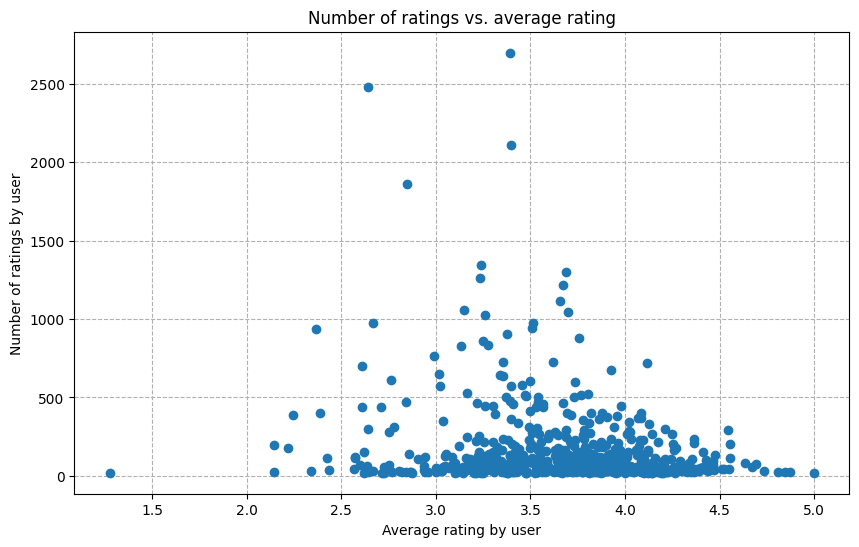

In [0]:
#Zad 37
pdf_stats = df_user_stats.toPandas()
plt.figure(figsize=(10, 6))
plt.plot(pdf_stats['avg_rating'], pdf_stats['count'], "o", alpha=1, label="data")
plt.title("Number of ratings vs. average rating")
plt.xlabel("Average rating by user")
plt.ylabel("Number of ratings by user")
plt.grid(True, linestyle='--', alpha=1)

plt.show()